## 地図に画像を張る

地図上に衛星画像を貼ってみよう。ここでは[NASA EarthData Gallery](https://lance.modaps.eosdis.nasa.gov/gallery/)から
[2017年台風第5号Noru](https://lance.modaps.eosdis.nasa.gov/cgi-bin/imagery/single.cgi?image=Noru.A2017217.0435.2km.jpg)の画像を取り込む。Windowsでは，保存する際`jpg`の前の`.`以外は`_`に変換され，`Noru_A2017217_0435_2km.jpg`のようになることがある。その際は以下のスクリプト中でも`_`を使ったファイル名を用いること。

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fname = "Noru.A2017217.0435.2km.jpg"
img = plt.imread(fname)

`imread()`でJPEG画像を読み，`img`に格納した。`img`には何が入っているのだろうか。まず`type()`型を調べてみる。

In [2]:
type(img)

numpy.ndarray

Numpyの数値配列`ndarray`であることが分かった。形状を`shape`で調べる。

In [3]:
img.shape

(1050, 800, 3)

1050x800x3の3次元配列である。大きさが1050x800画素でRGBのカラー画像だ。最初の画素は何色だろうか。

In [4]:
img[0,0,:]

array([248, 247, 245], dtype=uint8)

`imshow()`で表示する。

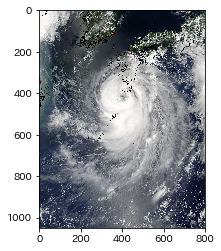

In [5]:
plt.imshow(img)
plt.show()

画像のページの「more information」を見ると四隅の座標が分かる。`img_extent`というタプルを`imshow()`のキーワード引数`extent`に与えて地図上に貼る。

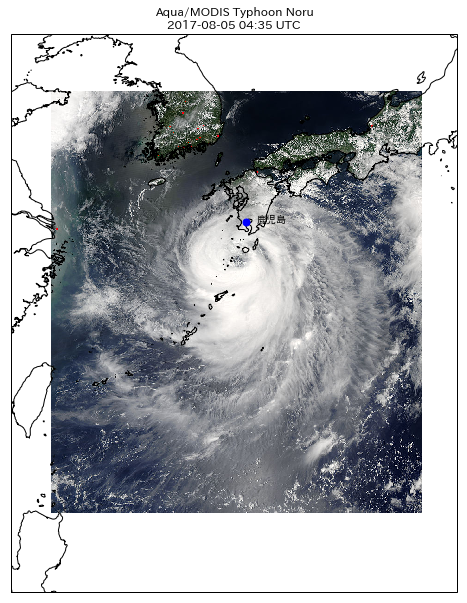

In [6]:
fig = plt.figure(figsize=(8, 12))

img_extent = (121.7937, 138.4089, 18.5564, 37.4421)
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Aqua/MODIS Typhoon Noru\n' '2017-08-05 04:35 UTC')

ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=1)

ax.set_extent([120, 140, 15, 40])

ax.plot(130.557139, 31.596806, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(131, 31.6, '鹿児島', transform=ccrs.Geodetic())

plt.show()